In [36]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
folder_path = "/content/drive/MyDrive/PlantVillage"

In [39]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [40]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    folder_path, shuffle = True, image_size = (IMAGE_SIZE,IMAGE_SIZE), batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [41]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [42]:
len(dataset)

68

In [43]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 0 1 0 1 1 1 2 0 0 1 1 0 1 1 1 0 1 2 0 1 0 1 1 0 0 0 0 1 0]


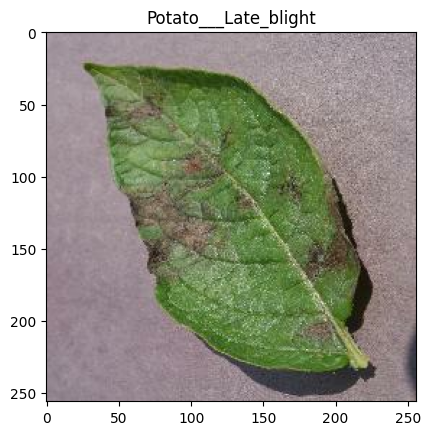

In [44]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.title(class_names[label_batch[0]])

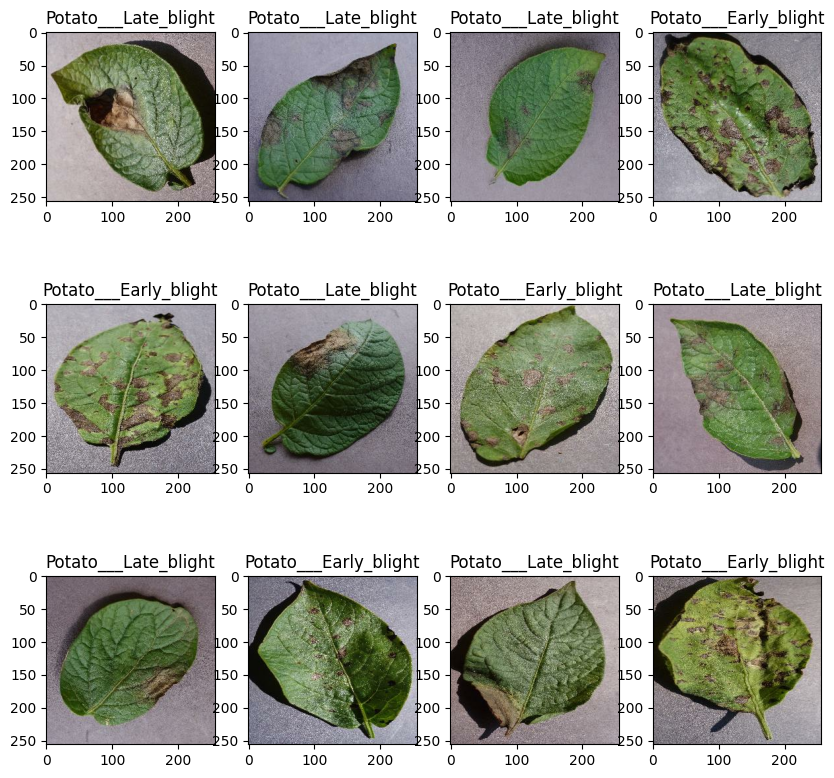

In [45]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])

In [46]:
len(dataset)

68

In [47]:
train_size = 0.8
train_dataset = dataset.take(int(len(dataset) * train_size))

In [48]:
len(train_dataset)

54

In [49]:
test_dataset = dataset.skip(len(train_dataset))
len(test_dataset)

14

In [50]:
val_size = 0.1
val_dataset = test_dataset.take(int(len(dataset) * val_size))
len(val_dataset)

6

In [51]:
test_dataset = test_dataset.skip(len(val_dataset))
len(test_dataset)

8

In [59]:
def get_dataset_partitions_tf(dataset, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle=True, shuffle_size=10000):
  ds_size = len(dataset)
  if shuffle:
    dataset = dataset.shuffle(shuffle_size, seed=12)
  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = dataset.take(train_size)
  val_ds = dataset.skip(train_size).take(val_size)
  test_ds = dataset.skip(train_size).skip(val_size)


  return train_ds, val_ds, test_ds

In [60]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [61]:
len(train_ds)

54

In [62]:
len(val_ds)

6

In [63]:
len(test_ds)

8

In [64]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.preprocessing.Rescaling(1.0/255)

])

In [66]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])